In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## import the clean data

In [2]:
df = pd.read_csv("data/clean_mexico_real_estate.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [4]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


## Location Data: "lat" and "lon"
Since __latitude__ and __longitude__ are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the **scatter_mapbox** from the plotly library

In [5]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=800,  # Width of map display
    height=600,  # Height of map display
    hover_data=["price_usd", "area_m2", "state"],  # Display price and area_m2 when hovering mouse over a house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## Categorical Data: "state"

In [6]:
df["state"].unique()  # This gives me the number count of unique values(states) in the column(state)


array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [7]:
df["state"].nunique()  # This gives a list of the unique value names in the state column

30

In [8]:
df["state"].value_counts()  # This counts the total houses in the state in a series format from highest to lowest

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

In [9]:
# Top 10 most represented states in the dataset
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

## Numerical Data: "area_m2" and "price_usd"
We have a sense for where the houses in our dataset are located, but how much do they cost? How big are they? The best way to answer those questions is looking at __descriptive statistics.__

In [10]:
# Gives the count, means, standard deviation(std), min & max, and different % values
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


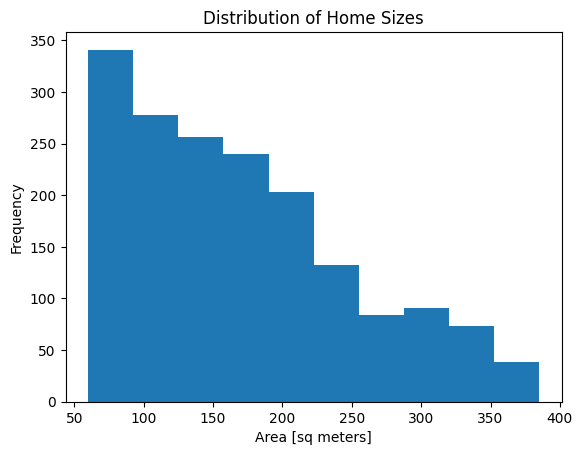

In [11]:
#  DISTRIBUTION OF THE HOUSE SIZES

plt.hist(df["area_m2"])  # An histogram charm 
plt.xlabel("Area [sq meters]")  # x axis label name
plt.ylabel("Frequency")  # y axis label name
plt.title("Distribution of Home Sizes");  # NOTE: The semicolon is for removing unnecessary values from the chart

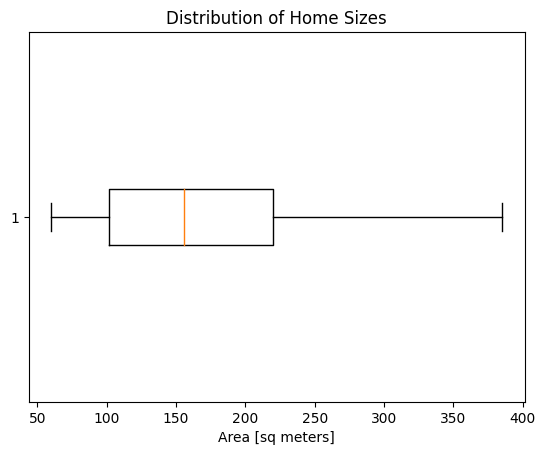

In [12]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

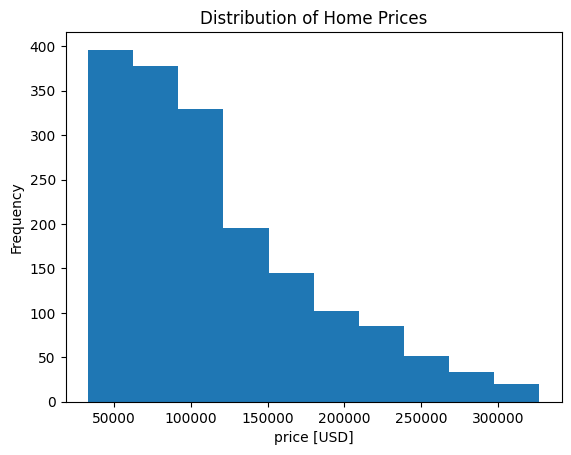

In [13]:
plt.hist(df["price_usd"])
plt.xlabel("price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

# QUESTIONS

## Q1. Which state has the most expensive real estate market?

In [14]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

## State Mean Bar Chart

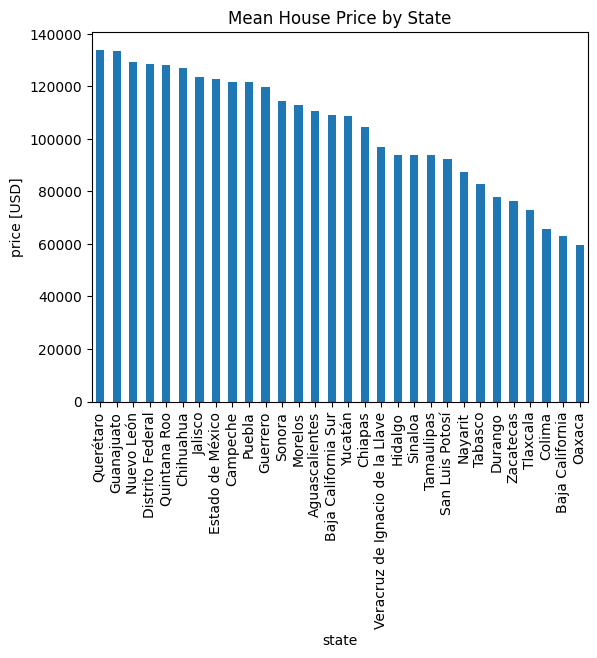

In [15]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="price [USD]",
    title="Mean House Price by State"
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, **according to recent GDP numbers**, it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

In [16]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

In [17]:
mean_price_per_m2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
mean_price_per_m2

state
Distrito Federal                   1175.889150
Estado de México                    763.753422
Guerrero                            761.557206
Jalisco                             743.568107
Quintana Roo                        736.455284
Nuevo León                          723.710040
Puebla                              700.701974
Querétaro                           687.227849
Oaxaca                              683.019737
Guanajuato                          672.908100
Baja California Sur                 662.401953
Morelos                             649.383992
Tabasco                             643.503348
Campeche                            601.291762
Nayarit                             599.293627
Baja California                     598.852988
Chihuahua                           591.226747
Chiapas                             560.317146
Sinaloa                             546.536310
Yucatán                             545.889476
Tamaulipas                          541.282076
Veracru

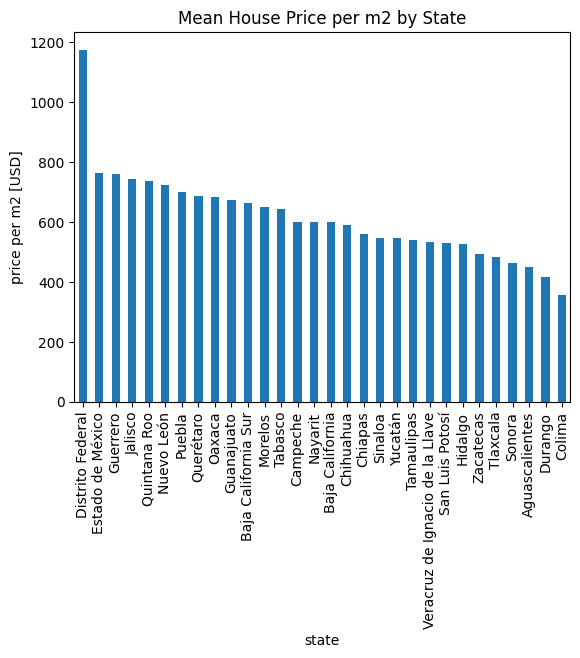

In [18]:
mean_price_per_m2.plot(
    kind="bar",
    xlabel="state",
    ylabel="price per m2 [USD]",
    title="Mean House Price per m2 by State"
);

Now we see that the capital Mexico City __(Distrito Federal)__ is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

## Q2. Is there a relationship between home size and price?

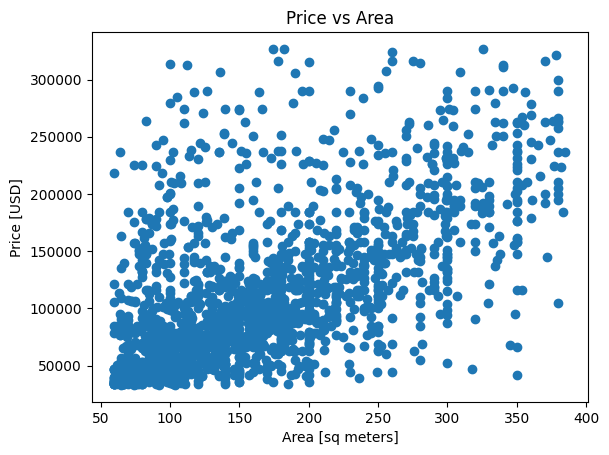

In [19]:
plt.scatter(y=df["price_usd"], x=df["area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

In [20]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.585518245323206


The __correlation coefficient__ is over __0.5__, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [21]:
df_morelos = df[df["state"] == "Morelos"]
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


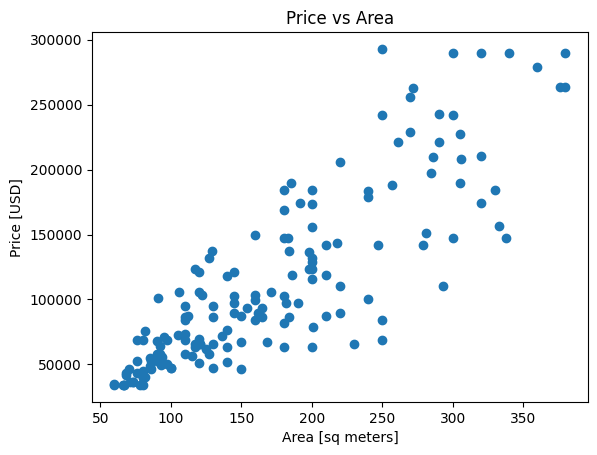

In [22]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

In [23]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8498077608713712


With a __correlation coefficient__ that high at __0.8__, we can say that there's a strong relationship between house size and price in Morelos.

In [24]:
df_mexico_city = df[df["state"] == "Distrito Federal"]
df_mexico_city.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629


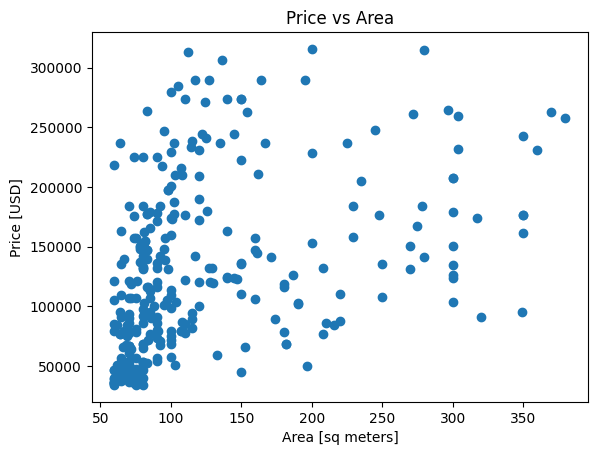

In [25]:
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

In [26]:
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

0.41070392130717864


Looking at the scatter plot and __correlation coefficient__, there's see a weak relationship between __size__ and __price__. How should we interpret this?

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are __other factors__ that have a larger influence on price.